# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [2]:
# Обозначим эмпирические данные молодых особей
alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

# Обозначим эмпирические данные взрослых особей
alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
# И размер выборки
Nmax = 50

### 2.2 Генерации стратегий

In [3]:
#rn.seed(10)

In [4]:
# # Старая версия генерации
# import random as rn
# import pandas as pd
# # Генерация параметров для стратегий
# # Запись параметров в data_strat
# def strategy(Nmax):
#     def rand_strat():
#         A, B = [], []
#         for i in range(0, Nmax):
#             a = rn.uniform(-D, 0)
#             b = rn.uniform(0, min(-a, a + D))
#             A.append(a)
#             B.append(b)
#             A.append(a)
#             B.append(-b)
#         return A, B
# 
#     A, B = rand_strat()
#     data_strat1 = {'Aj': A, 'Bj': B}
#     data1 = pd.DataFrame(data = data_strat1)
#     A, B = rand_strat()
#     data_strat2 = {'Aa': A, 'Ba': B}
#     data2 = pd.DataFrame(data = data_strat2)
#     data = pd.concat([data1, data2], axis=1)
#     data.to_csv("data_strat.csv", index=False)
#     return data
# data_strat = strategy(Nmax)
# data_strat

In [5]:
# Генерация с перемешиванием
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров в data_strat
def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        rn.shuffle(A)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(0, min(-a[i], a[i] + D*100))
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat

,Aj,Bj,Aa,Ba
0,-27.78,23.35,-59.23,22.02
1,-27.78,-23.35,-59.23,-22.02
2,-58.93,35.37,-63.63,24.81
3,-58.93,-35.37,-63.63,-24.81
4,-17.83,3.87,-107.67,7.44
...,...,...,...,...
95,-113.80,-3.83,-33.52,-10.93
96,-63.43,44.34,-5.33,3.96
97,-63.43,-44.34,-5.33,-3.96
98,-36.35,2.16,-46.21,23.10


### 2.3 Подсчет макропараметров и создание выборки

In [6]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров с обычными функциями окружающей среды
# Запись их в data_macro
def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*np.pi*np.pi*Bj[i]*Bj[i])
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*np.pi*np.pi*Ba[i]*Ba[i])
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   #for i in range(1, 9):
   #   for j in range(1, 9):
   #      if i == j:
   #         Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(i)])
   #         collect_M['M' + str(i) + 'M' + str(i)].append(list(Z))
   #      else:
   #         continue
   #for i in range(2, 9):
   #   for j in range(1, i):
   #      Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
   #      collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))

   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   #for i in range(1, 9):
   #   for j in range(1, 9):
   #      if i == j:
   #         data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
   #      else:
   #         continue
   #for i in range(2, 9):
   #   for j in range(1, i):
   #      data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)

In [7]:
import pandas as pd
from collections import defaultdict
from sklearn.utils import shuffle
# Подсчет фитнесса
# Запись в data_fit_macro
def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = data.loc[data.J !=0]
   data = shuffle(data)
   data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [8]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()


In [9]:
import numpy as np
from collections import defaultdict
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      max_M.append(max(np.abs(data_param['M' + str(i)].tolist())))
      Z = list(np.array(data_param['M' + str(i)].tolist())/max(np.abs(data_param['M' + str(i)].tolist())))
      data['M' + str(i) + '_n'] = Z
   #for i in range(1, 9):
   #   for j in range(1, 9):
   #      if i == j:
   #         max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
   #         Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
   #         data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   #      else:
   #         continue   
   #for i in range(2, 9):
   #   for j in range(1, i):
   #      max_M.append(max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist())))
   #      Z = np.array(data_param['M' + str(i) + 'M' + str(j)].tolist())/max(np.abs(data_param['M' + str(i) + 'M' + str(j)].tolist()))
   #      data['M' + str(i) + 'M' + str(j) + '_n'] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1_n,M2_n,M3_n,M4_n,M5_n,M6_n,M7_n,M8_n,target
0,-0.371836,0.197673,-0.889887,0.619308,0.445009,-0.668531,-0.927331,0.028011,1.0
1,0.371836,-0.197673,0.889887,-0.619308,-0.445009,0.668531,0.927331,-0.028011,-1.0
2,-0.019223,-0.072235,-0.677546,-0.123856,-0.010536,-0.099577,-0.641209,-0.225740,1.0
3,0.019223,0.072235,0.677546,0.123856,0.010536,0.099577,0.641209,0.225740,-1.0
4,0.469750,-0.670174,-0.876230,-0.038474,-0.517190,0.236530,-0.924514,0.545402,-1.0
...,...,...,...,...,...,...,...,...,...
8367,-0.204497,0.325806,0.208905,0.282676,-0.168854,0.382031,-0.403979,-0.006334,-1.0
8368,0.116880,-0.387264,0.656639,-0.025168,0.174861,-0.466921,0.901305,0.182305,1.0
8369,-0.116880,0.387264,-0.656639,0.025168,-0.174861,0.466921,-0.901305,-0.182305,-1.0
8370,-0.087617,-0.061458,0.865544,0.257508,0.006007,-0.084891,0.497326,0.175970,1.0


### 2.4 Проверка корреляции

<AxesSubplot:>

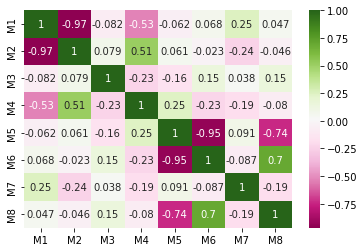

In [10]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

X = data_norm.drop('target', axis=1)
correlation = X[['M' + str(i) + '_n' for i in range(1, 9)]]
correlation.rename(columns={'M' + str(i) + '_n': 'M' + str(i) for i in range(1, 9)}, inplace=True)
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")

### 2.5 Реализация машинного обучения для SVM и LDA

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [13]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [14]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
# print('Точность классификатора:')
# print('     SVM: ', accuracy_score(SVC_prediction, y_test))
# print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Logloss:
     SVM:  0.003260537382683505
     LDA:  0.004689960088608603


<AxesSubplot:>

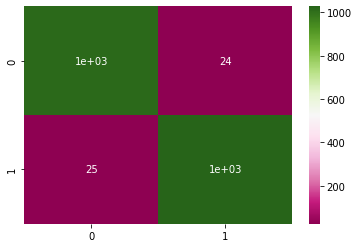

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sea
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")


### 2.6 Графики 

#### 2.6.1 Двумерные

In [16]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [17]:
## Вывод части графиков
#import matplotlib.pyplot as plt
#X=data_norm.loc[:,'M1_n':'M8M7_n']
#y=data_norm.loc[:,'target']
#X1 = X[y==1]
#X0 = X[y==-1]
#for i in range(0, 8):
#    for j in range(i + 1, 7):
#        x=np.linspace(-1, 1)
#        plt.figure(figsize=(7, 7))
#        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#        plt.xlim(-1,1)
#        plt.ylim(-1,1)
#        plt.legend()
#        plt.xlabel(X.columns[i])
#        plt.ylabel(X.columns[j])
#        plt.grid()
#        plt.show()

#### 2.6.2 Трехмерные

In [18]:
# Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data.loc[:,'M1_n':'M8M7_n']
# y=data.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [19]:
# Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1_n':'M8M7_n']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Частные производные

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 БЕ БЕ БЕ

In [20]:
import pandas as pd
import numpy as np
# Заново считаем J с s,p,q,r
def middle_SPQR(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      M1 = (sigma1*(Aj[i] + D))
      M2 = (-sigma2*(Aj[i] + D + Bj[i]/2))
      M3 = (-2*((np.pi**2)*(Bj[i]**2)))
      M4 = (-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5 = (sigma1*(Aa[i] + D))
      M6 = (-sigma2*(Aa[i] + D + Ba[i]/2))
      M7 = (-2*((np.pi**2)*(Ba[i]**2)))
      M8 = (-((Aa[i] + D0)**2 + (Ba[i]**2)/2))

      p = alpha_j*M1 + betta_j*M3 + delta_j*M4
      q = gamma_j*M2
      r = alpha_a*M5 + betta_a*M7 + delta_a*M8
      s = gamma_a*M6
      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'A_J': Aj[i], 'B_J': Bj[i], 'A_A': Aa[i], 'B_A': Ba[i]}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv('data_middle_SPQR.csv', index=False)
   data_middle_SPQR = data_middle_SPQR.loc[data_middle_SPQR.J !=0]
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR[:60]

data = middle_SPQR(data_strat)
data

,J,S,P,Q,R,A_J,B_J,A_A,B_A
72,1.072477,-0.45844,0.113623,-0.008371,0.439233,-23.76,16.79,-6.75,2.72
10,1.071401,-0.45560,0.116525,-0.009183,0.442034,-9.74,9.06,-11.37,10.54
32,1.056083,-0.46090,0.094108,-0.005576,0.439896,-57.03,13.46,-7.77,5.99
73,1.052805,-0.44756,0.113623,-0.007028,0.439233,-23.76,-16.79,-6.75,-2.72
14,1.039467,-0.46610,0.072546,-0.004936,0.434222,-68.72,20.84,-3.79,0.63
15,1.034570,-0.46358,0.072546,-0.003269,0.434222,-68.72,-20.84,-3.79,-0.63
70,1.020891,-0.43448,0.104360,-0.005604,0.443449,-51.14,2.39,-18.52,14.28
40,1.019056,-0.44706,0.082201,-0.007178,0.444224,-47.45,34.35,-11.13,5.79
33,1.012797,-0.43694,0.094108,-0.004499,0.439896,-57.03,-13.46,-7.77,-5.99
36,1.012150,-0.42134,0.119341,-0.008240,0.438208,-19.75,5.49,-23.95,18.57


In [32]:
z = 15

In [33]:
import pandas as pd
import numpy as np
def differential():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   p = alpha_j*M1[z] + betta_j*M3[z] + delta_j*M4[z]
   q = gamma_j*M2[z]
   r = alpha_a*M5[z] + betta_a*M7[z] + delta_a*M8[z]
   s = gamma_a*M6[z]

   # Частные производные первого порядка
   hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
   hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
   # Частные производные второго порядка
   hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)/2
   hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)/2
   hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)/2
   hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)/2
   # Частные производные второго порядка | другие
   hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
   hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
   hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
   hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
   hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

   """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
   return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential()

lam_0 = [SVC_coef[i]/Max_M[i] for i in range(0, 8)]
lam_8, lam_28 = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_8.append(lam_0[i]*lam_0[j])
for i in range(1, 8):
    for j in range(0, i):
        lam_28.append(lam_0[i]*lam_0[j])
lam = lam_0 + lam_8 + lam_28

empirical = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
empirical_8, empirical_28 = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            empirical_8.append(empirical[i]*empirical[j])
for i in range(1, 8):
    for j in range(0, i):
        empirical_28.append(empirical[i]*empirical[j])
coef = empirical + empirical_8 + empirical_28


coef[0] = coef[0]*hp            #M1
coef[1] = coef[1]*hq            #M2
coef[2] = coef[2]*hp            #M3
coef[3] = coef[3]*hp            #M4
coef[4] = coef[4]*hr            #M5
coef[5] = coef[5]*hs            #M6
coef[6] = coef[6]*hr            #M7
coef[7] = coef[7]*hr            #M8
coef[8] = coef[8]*hpp           #M11
coef[9] = coef[9]*hqq           #M22
coef[10] = coef[10]*hpp         #M33
coef[11] = coef[11]*hpp         #M44
coef[12] = coef[12]*hrr         #M55
coef[13] = coef[13]*hss         #M66
coef[14] = coef[14]*hrr         #M77
coef[15] = coef[15]*hrr         #M88
coef[16] = coef[16]*hpq         #M21
coef[17] = coef[17]*hpp         #M31
coef[18] = coef[18]*hpq         #M32
coef[19] = coef[19]*hpp         #M41
coef[20] = coef[20]*hpq         #M42
coef[21] = coef[21]*hpp         #M43
coef[22] = coef[22]*hpr         #M51
coef[23] = coef[23]*hqr         #M52
coef[24] = coef[24]*hpr         #M53
coef[25] = coef[25]*hpr         #M54
coef[26] = coef[26]*hsp         #M61
coef[27] = coef[27]*hsq         #M62
coef[28] = coef[28]*hpq         #M63
coef[29] = coef[29]*hpq         #M64
coef[30] = coef[30]*hsr         #M65
coef[31] = coef[31]*hpr         #M71
coef[32] = coef[32]*hqr         #M72
coef[33] = coef[33]*hpr         #M73
coef[34] = coef[34]*hpr         #M74
coef[35] = coef[35]*hrr         #M75
coef[36] = coef[36]*hsr         #M76
coef[37] = coef[37]*hpr         #M81
coef[38] = coef[38]*hqr         #M82
coef[39] = coef[39]*hpr         #M83
coef[40] = coef[40]*hpr         #M84
coef[41] = coef[41]*hrr         #M85
coef[42] = coef[42]*hsr         #M86
coef[43] = coef[43]*hrr         #M87
""""
df=pd.DataFrame([['hp',  hp/hr],
                 ['hq',  hq/hr],
                 ['hr',  hr/hr],
                 ['hs',  hs/hr],
                 ['hpp',hpp/hr],
                 ['hqq',hqq/hr],
                 ['hrr',hrr/hr],
                 ['hss',hss/hr],
                 ], 
    columns=['id','Тейлор'])
df

df=pd.DataFrame([['1', coef[0]/coef[5], lam[0]/lam[5]],
                 ['2', coef[1]/coef[5], lam[1]/lam[5]],
                 ['3', coef[2]/coef[5], lam[2]/lam[5]],
                 ['4', coef[3]/coef[5], lam[3]/lam[5]],
                 ['5', coef[4]/coef[5], lam[4]/lam[5]],
                 ['6', coef[5]/coef[5], lam[5]/lam[5]],
                 ['7', coef[6]/coef[5], lam[6]/lam[5]],
                 ['8', coef[7]/coef[5], lam[7]/lam[5]],
                 ['11',coef[8]/coef[5], lam[8]/lam[5]],
                 ['22',coef[9]/coef[5], lam[9]/lam[5]],
                 ['33',  coef[10]/coef[5], lam[10]/lam[5]],
                 ['44',  coef[11]/coef[5], lam[11]/lam[5]],
                 ['55',  coef[12]/coef[5], lam[12]/lam[5]],
                 ['66',  coef[13]/coef[5], lam[13]/lam[5]],
                 ['77',  coef[14]/coef[5], lam[14]/lam[5]],
                 ['88',  coef[15]/coef[5], lam[15]/lam[5]],
                 ], 
    columns=['id','Тейлор', 'SVM'])
df """

""" df=pd.DataFrame([['M1', hp*alpha_j/(hp*alpha_j) ,SVC_coef[0]/SVC_coef[0]],
                 ['M2', hq*gamma_j/(hp*alpha_j) ,SVC_coef[1]/SVC_coef[0]],
                 ['M3', hp*betta_j/(hp*alpha_j) ,SVC_coef[2]/SVC_coef[0]],
                 ['M4', hp*delta_j/(hp*alpha_j) ,SVC_coef[3]/SVC_coef[0]],
                 ], 
    columns=['id','Тейлор', 'SVC'])
df """

print(coef[5]*coef[2], '        ', lam[5]*lam[2])

M1 = data_macro['M1'].tolist()
M2 = data_macro['M2'].tolist()
M3 = data_macro['M3'].tolist()
M4 = data_macro['M4'].tolist()
M5 = data_macro['M5'].tolist()
M6 = data_macro['M6'].tolist()
M7 = data_macro['M7'].tolist()
M8 = data_macro['M8'].tolist()

p = alpha_j*M1[z] + betta_j*M3[z] + delta_j*M4[z]
q = gamma_j*M2[z]
r = alpha_a*M5[z] + betta_a*M7[z] + delta_a*M8[z]
s = gamma_a*M6[z]

p_ = lam[0]*M1[z] + lam[2]*M3[z] + lam[3]*M4[z]
q_ = lam[1]*M2[z]
r_ = lam[4]*M5[z] + lam[6]*M7[z] + lam[7]*M8[z]
s_ = lam[5]*M6[z]

gh = (q_*q_)/(q*q)

df=pd.DataFrame([['hp',  hp /hqq,  p_/p/gh],
                 ['hq',  hq /hqq,  q_/q/gh],
                 ['hr',  hr /hqq,  r_/r/gh],
                 ['hs',  hs /hqq,  s_/s/gh],
                 ['hpp', hpp/hqq , (p_*p_)/(p*p)/gh],
                 ['hqq', hqq/hqq , (q_*q_)/(q*q)/gh],
                 ['hrr', hrr/hqq , (r_*r_)/(r*r)/gh],
                 ['hss', hss/hqq , (s_*s_)/(s*s)/gh],
                 ['hsp', hsp/hqq , (s_*p_)/(s*p)/gh],
                 ['hsq', hsq/hqq , (s_*q_)/(s*q)/gh],
                 ['hsr', hsr/hqq , (s_*r_)/(s*r)/gh],
                 ['hpq', hpq/hqq , (p_*q_)/(p*q)/gh],
                 ['hpr', hpr/hqq , (p_*r_)/(p*r)/gh],
                 ['hqr', hqr/hqq , (q_*r_)/(q*r)/gh],
                 ], 
    columns=['id','Тейлор', 'SVC'])
df

-6.097948629231054e-09          -2.056051493492629e-06


,id,Тейлор,SVC
0,hp,4.951870,0.001912
1,hq,-0.698889,-0.009528
2,hr,0.944085,0.000799
3,hs,-7.633250,-0.002599
4,hpp,-12.330502,0.040280
5,hqq,1.000000,1.000000
6,hrr,-0.167072,0.007027
7,hss,1.000000,0.074419
8,hsp,5.345064,-0.054750
9,hsq,-2.000000,0.272799


In [34]:
def module(u):
    ans = 0
    for elem in u:
        ans += elem * elem
    return ans

def sc(u, v):
    ans = 0;
    for i in range(len(u)):
        ans += u[i] * v[i];
    return ans;


def cos_n(u, v):
    return sc(u, v) / np.sqrt(module(u) * module(v))

print('Косинус между векторами =', cos_n(coef, lam))
    

Косинус между векторами = 0.9805807291679965


In [35]:
new_dict = {'SVM' : lam, 'Empirical' : coef}
for i in range(0, 44):
    print(lam[i], '         ', coef[i])

0.03564950156445186           0.0019017907748361794
-0.008396257132966956           -1.3420592004018934e-05
1.7952936254735666e-05           8.320334639908284e-07
0.0006677287542614118           1.9017907748361793e-05
0.03933846493782479           0.0013596765694020194
-0.11452452480859666           -0.007328970399799054
-6.493242183777038e-06           1.6995957117525244e-08
0.00017136578310078524           1.3596765694020195e-05
0.0012708869617938556           -7.576946247983995e-06
7.049713384289849e-05           1.5362201694037802e-09
3.223079201666023e-10           -1.4502748677781862e-12
4.458616892674969e-07           -7.576946247983995e-10
0.00154751482366447           -1.4437102937469958e-06
0.013115866782634872           3.84055042350945e-06
4.216219405718159e-11           -2.2557973339796807e-16
2.936623161774537e-08           -1.443710293746996e-10
-0.0002993223817972456           -1.6422389745094028e-07
6.400132290997037e-07           -3.3149139834929976e-09
-1.50737469086

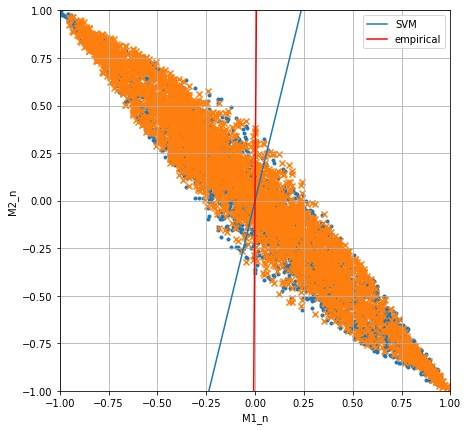

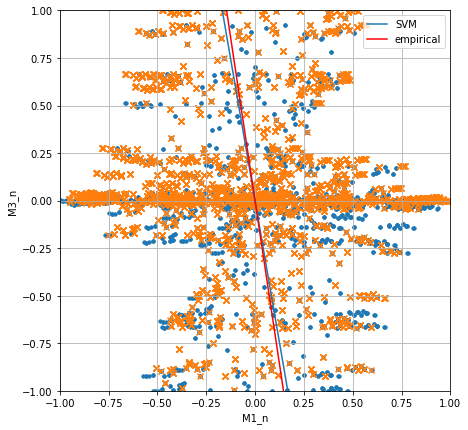

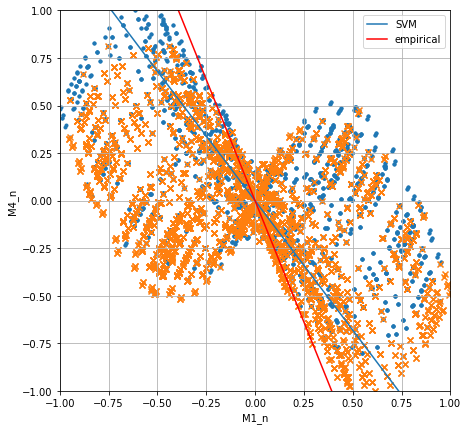

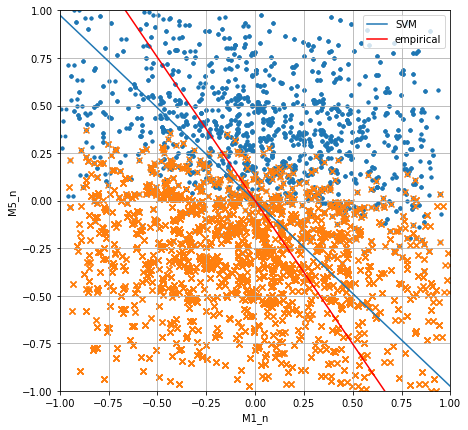

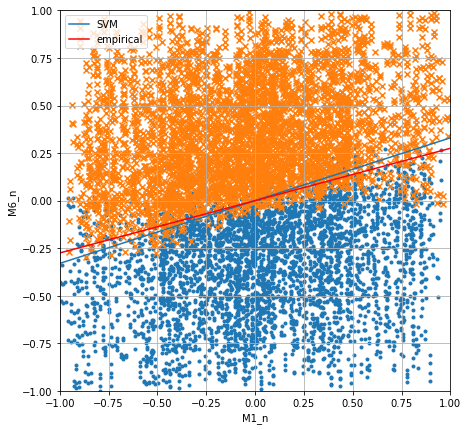

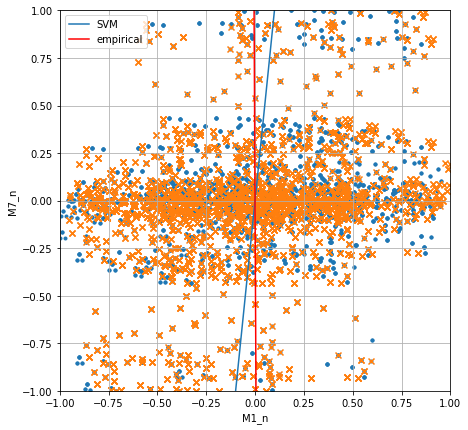

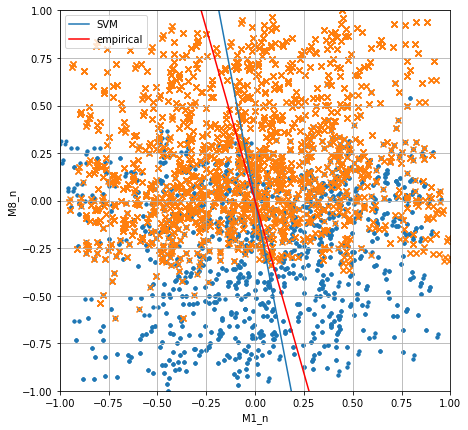

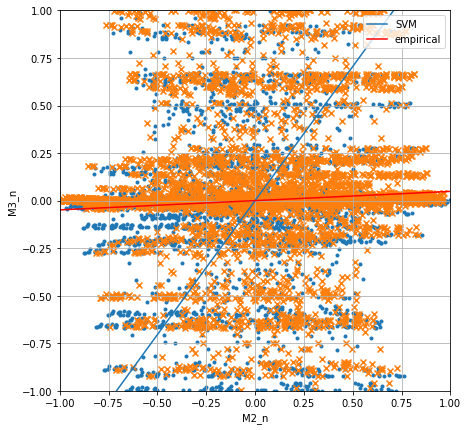

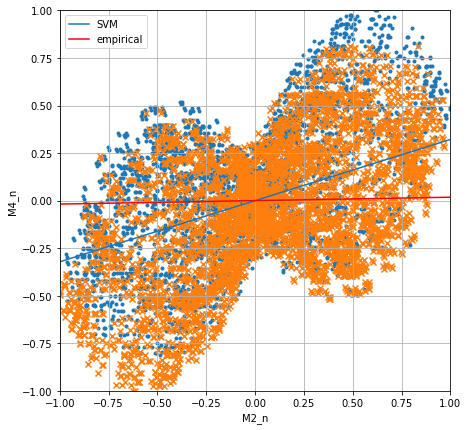

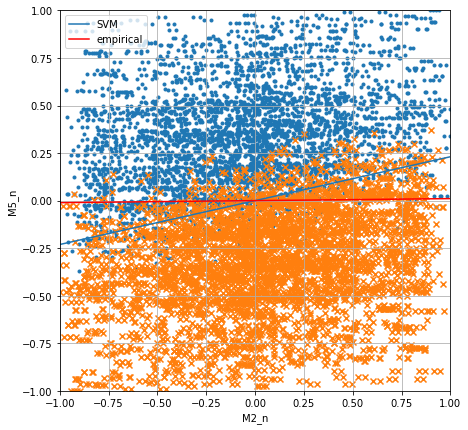

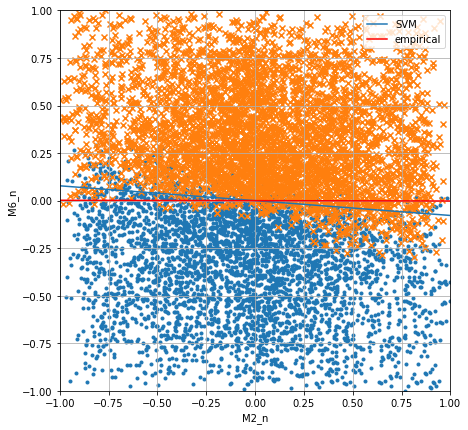

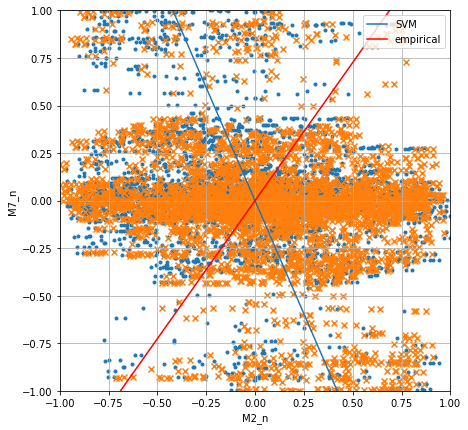

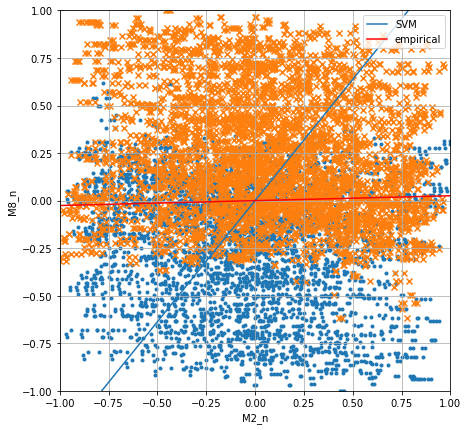

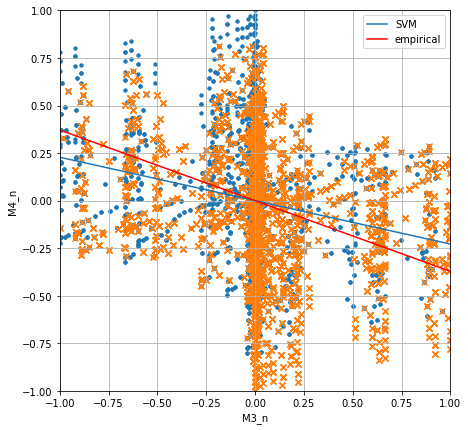

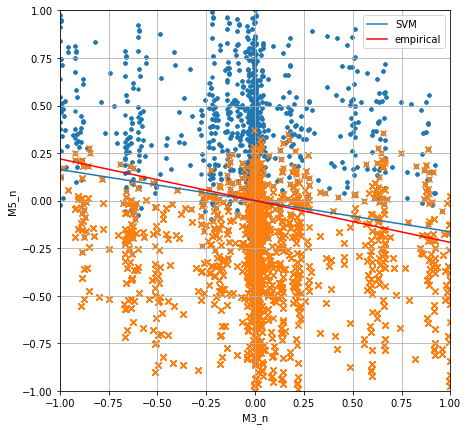

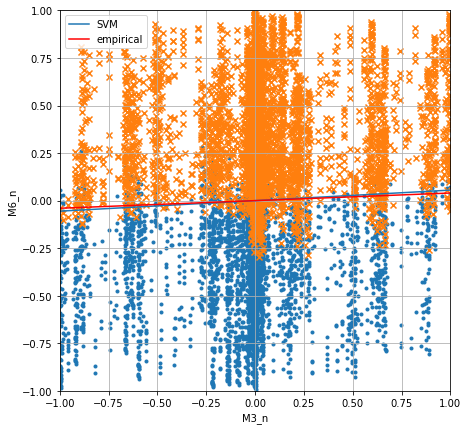

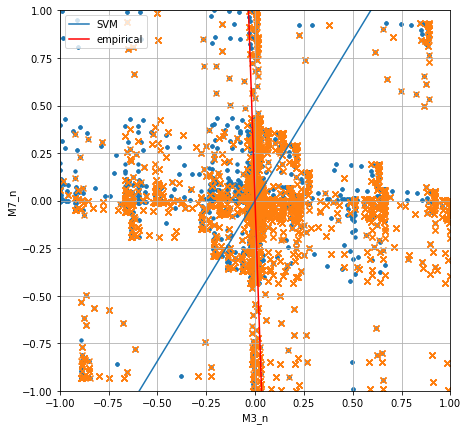

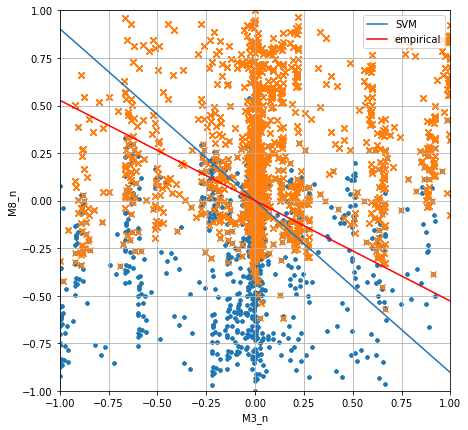

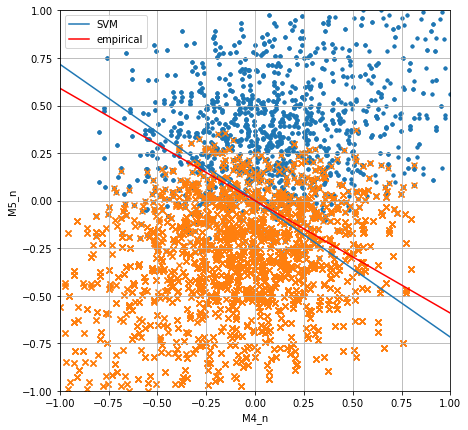

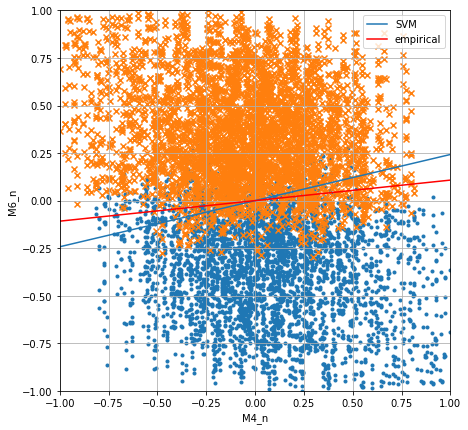

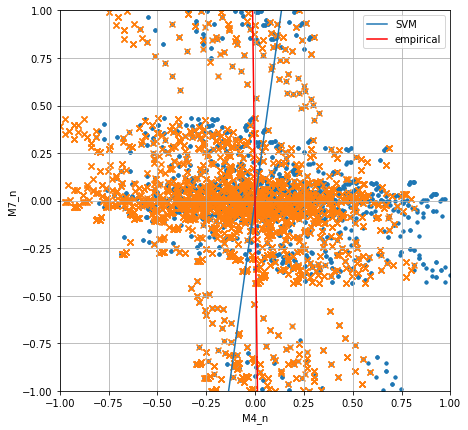

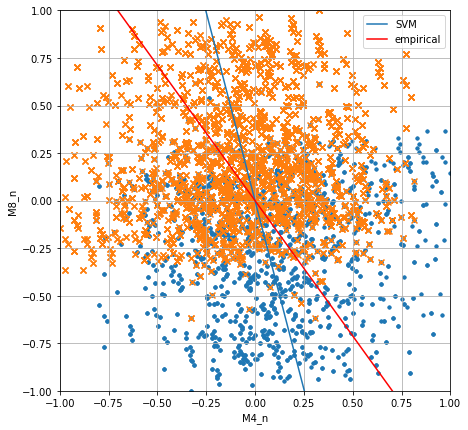

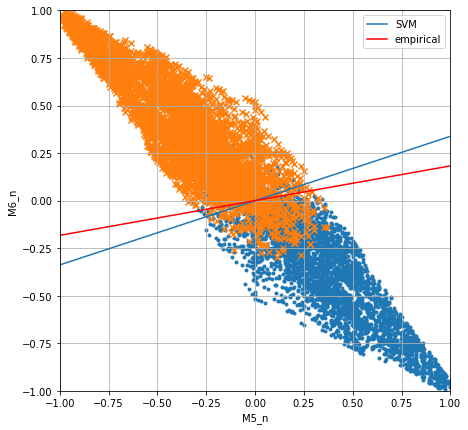

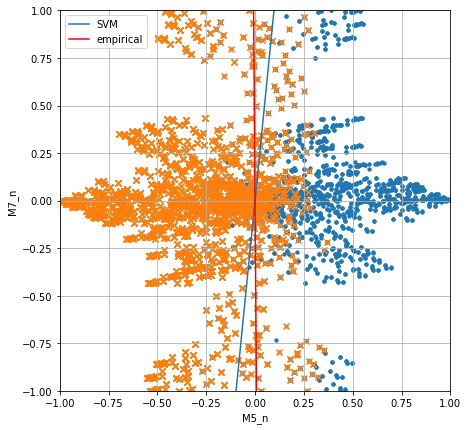

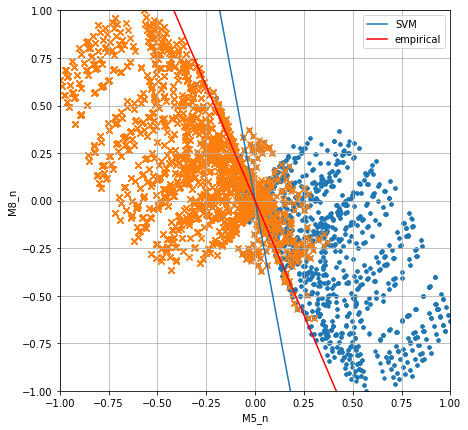

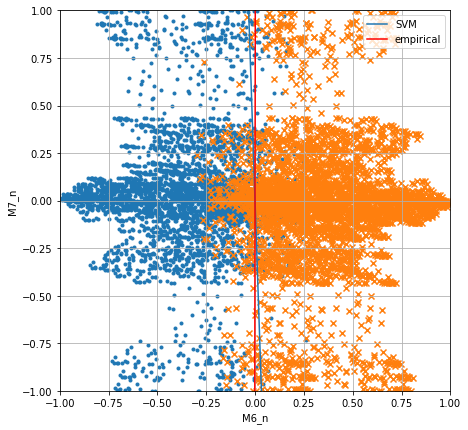

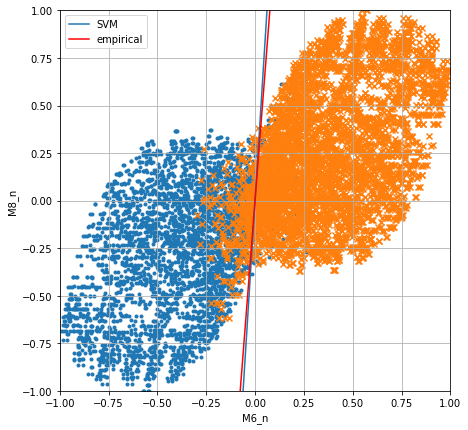

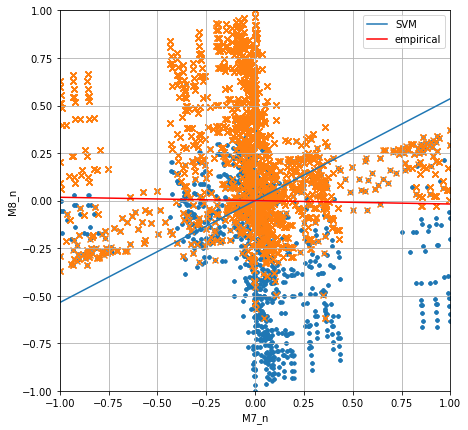

In [36]:
#Вывод всех графиков
import matplotlib.pyplot as plt
X=data_norm.loc[:,'M1_n':'M8_n']
y=data_norm.loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1)* (coef[i]*Max_M[i]) / (coef[j]*Max_M[j]) * x, label='empirical', color='red')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show()



Эмпирические
Молодые особи     -103.81071180733247 -79.86931890066252
Взрослые особи    -106.99450375064733 -31.89906026822203
SVM
Молодые особи     -103.81071180733247 -29.351003038228836
Взрослые особи    -106.99450375064733 306.0684735063311


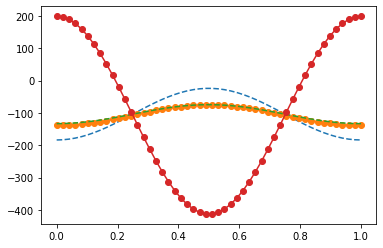

In [26]:
alpha_1 = lam[0]
gamma_1 = lam[1]
betta_1 = lam[2]
delta_1 = lam[3]

alpha_2 = lam[4]
gamma_2 = lam[5]
betta_2 = lam[6]
delta_2 = lam[7]

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

alpha_j = 0.0016
betta_j = 0.0000007
gamma_j = 0.00008
delta_j = 0.000016

alpha_a = 0.006
betta_a = 0.000000075
gamma_a = 0.004
delta_a = 0.00006

sigma1 = 1
sigma2 = 1
D = 120
D0 = 70
t = np.linspace(0, 1)

Aj = rn.uniform(-D, 0)
Aa = rn.uniform(-D, 0)

Bj = -(alpha_a*sigma1 - 2*delta_a*(Aj + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
x1 = Aj + Bj*np.cos(2*np.pi*t)

Ba = -(alpha_j*sigma1 - 2*delta_j*(Aa + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
x2 = Aa + Ba*np.cos(2*np.pi*t)

print('Эмпирические')
print('Молодые особи    ', Aj, Bj)
print('Взрослые особи   ', Aa, Ba)



Bj = -(alpha_1*sigma1 - 2*delta_1*(Aj + D0))/(2*(4*(np.pi**2)*betta_1 + delta_1))
x3 = Aj + Bj*np.cos(2*np.pi*t)
Ba = -(alpha_2*sigma1 - 2*delta_2*(Aa + D0))/(2*(4*(np.pi**2)*betta_2 + delta_2))
x4 = Aa + Ba*np.cos(2*np.pi*t)

print('SVM')
print('Молодые особи    ', Aj, Bj)
print('Взрослые особи   ', Aa, Ba)
plt.plot(t, x1, '--') #Молодые
plt.plot(t, x2, '-o') #Пожилые
plt.plot(t, x3, '--') #Молодые
plt.plot(t, x4, '-o') #Пожилые
plt.show()

In [27]:
from sympy import *

s, p, q, r = symbols('s p q r')
print(diff(diff(-s - p - q + (4*r*p + (p + q - s)**2)**(1/2), r), r))


-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5


In [28]:
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint
from scipy.optimize import LinearConstraint

def func(v):
    Aj, Aa = v[0], v[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    M1 = (sigma1*(Aj + D))
    M2 = (-sigma2*(Aj + D + Bj/2))
    M3 = (-2*(np.pi*Bj)**2)
    M4 = (-((Aj + D0)**2 + (Bj**2)/2))
    M5 = (sigma1*(Aa + D))
    M6 = (-sigma2*(Aa + D + Ba/2))
    M7 = (-2*(np.pi*Ba)**2)
    M8 = (-((Aa + D0)**2 + (Ba**2)/2))
    s = gamma_a*M6
    p = alpha_j*M1 + betta_j*M3 + delta_j*M4
    q = gamma_j*M2
    r = alpha_a*M5 + betta_a*M7 + delta_a*M8
    
    return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))

def constr_f1(v):
    Aj, Aa = v[0], v[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    M1 = (sigma1*(Aj + D))
    M2 = (-sigma2*(Aj + D + Bj/2))
    M3 = (-2*(np.pi*Bj)**2)
    M4 = (-((Aj + D0)**2 + (Bj**2)/2))
    M5 = (sigma1*(Aa + D))
    M6 = (-sigma2*(Aa + D + Ba/2))
    M7 = (-2*(np.pi*Ba)**2)
    M8 = (-((Aa + D0)**2 + (Ba**2)/2))
    s = gamma_a*M6
    p = alpha_j*M1 + betta_j*M3 + delta_j*M4
    q = gamma_j*M2
    r = alpha_a*M5 + betta_a*M7 + delta_a*M8
    return -(4*r*p + (p + q - s)**2)

def constr_f2(v):
    Aj = v[0]
    # Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
    return -min(Aj+D,-1*Aj) + np.abs(Bj)

def constr_f3(v):
    Aa = v[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))
    return -min(Aa+D,-1*Aa) + np.abs(Ba)


nlc1 = NonlinearConstraint(constr_f1, -np.inf, 0)
nlc2 = NonlinearConstraint(constr_f2, -np.inf, 0)
nlc3 = NonlinearConstraint(constr_f3, -np.inf, 0)

nlc=(nlc1,nlc2,nlc3)
bounds = ((-D, 0), (-D, 0))
result_DE = differential_evolution(func, bounds, constraints=(nlc))
result_DE

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


           constr: [array([0.]), array([0.]), array([0.])]
 constr_violation: 0.0
              fun: -1.0828400794837902
              jac: [array([[ 0.0001699 , -0.00589051]]), array([[ 1.36667905, -0.        ]]), array([[-0.        ,  1.95297269]]), array([[1., 0.],
       [0., 1.]])]
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 569
              nit: 15
          success: True
                x: array([-19.4412466 ,  -9.75933061])

Оптимизация DE
-9.759330609904783 9.759078185065723
-19.44124659815012 0.20488315551257874


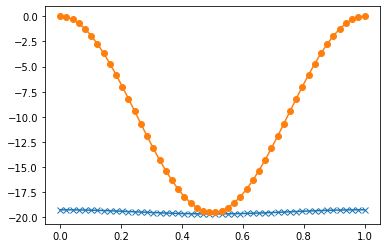

In [29]:
Aj = result_DE.x[0]
Aa = result_DE.x[1]

Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + D0))/(2*(4*(np.pi**2)*betta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + D0))/(2*(4*(np.pi**2)*betta_a + delta_a))

import numpy as np
import random as rn 
import matplotlib.pyplot as plt

t = np.linspace(0, 1)
#Какие то стандартные значения из таблицы макс фитнеса, ну или просто 

x1 = Aj + Bj*np.cos(2*np.pi*t)
x2 = Aa + Ba*np.cos(2*np.pi*t)
print('Оптимизация DE')
print(Aa, Ba)
print(Aj, Bj)
plt.plot(t, x1, '-x') #Молодые
plt.plot(t, x2, '-o') #Пожилые
plt.show()

In [30]:
12222222222222222222222 asd

SyntaxError: invalid syntax (Temp/ipykernel_11816/1764362747.py, line 1)